# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

Les images proviennent du jeu de données publiques *The Extended Yale Face Database B* disponible sur le site http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html.


## TD6 : Reconnaissance faciale avec l'analyse en composantes principales


Nous utiliserons des images récupérées de la base de données publique de Yale$^{(1)}$ que vous pouvez trouver sur Moodle. Nous avons choisi les 2 ensembles de telle sorte que l'ensemble de test contienne à la fois des images déjà vues et d'autres tout-à-fait nouvelles. L'objectif final est de mesurer la performance de notre algorithme en comptant le nombre d'exemples bien classifiés.

Plusieurs librairies que nous n'utilisons pas régulièrement dans le cours sont nécessaire. Exécutez la prochaine cellule de code pour installer ces librairies.

In [1]:
using Pkg
Pkg.add(["Images","Netpbm","ImageMagick","Colors"])

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
# Librairies standards du cours
using Statistics, LinearAlgebra, Gadfly, DataFrames

# Librairie pour le traitement des images
# using Images, Netpbm, ImageMagick, QuartzImageIO, Colors
using Images, Netpbm, ImageMagick, Colors


# 1. Chargement des images d'entraînement
___

Les images d'entraînement sont contenues dans le dossier *Train* du jeu de données que vous pouvez récupérer sur Moodle. L'ensemble d'entraînement est constitué de 784 images provenant de 28 personnes différente, soit de 28 images par personne.

Les images sont des visages déjà correctement alignés, ce qui nous permet de nous concentrer directemement sur la reconnaissance des visages.







In [3]:
# Récupération de tous les noms de fichiers de l'échantillon d'entraînement
file = readdir("Train")
trainFileName = ["Train/"*file[i] for i=1:length(file)];

,,,,,,,

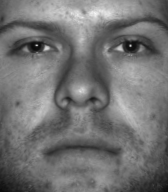
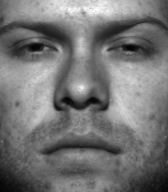
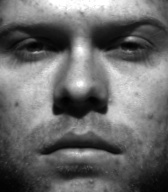
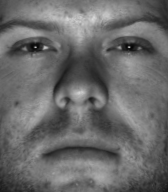
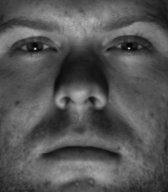
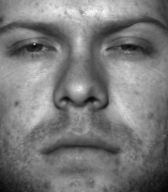
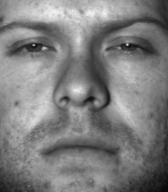
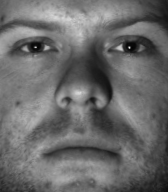

In [4]:
# Affichage des 8 photos de la première personne
load.(trainFileName[1:8])

,,,,,,,

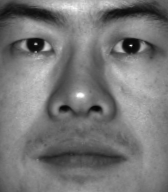
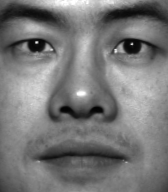
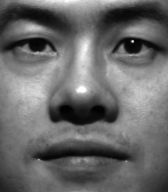
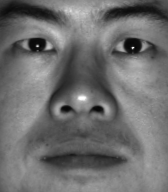
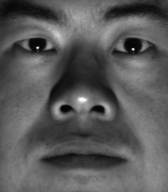
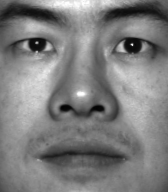
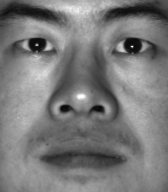
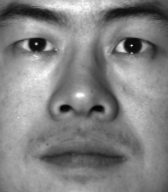

In [5]:
# Affichage des 8 photos de la huitième personne
load.(trainFileName[29:36])

In [6]:
"""
    imgrayconvert(imageFileName ; columnStack=true ; T=Int64)

Conversion en intensité de gris de l'image du fichier `imageFileName`.

### Arguments
- `imageFileName::string` : le nom du fichier de l'image
- `columnStack::bool=true` : Si `true`, l'image est renvoyée comme un vecteur colonne (option par défaut) 
                             sinon la fonction renvoie la matrice des niveaux de gris.
- `T::DataType=Int64` : Type des éléments de la matrice (Int64 par défaut).

### Details
 
La fonction retourne la matrice ou le vecteur colonne des niveaux de gris.
 
### Examples

\```
 julia> imgrayconvert(imageFileName)
 julia> imgrayconvert(imageFileName ; columnStack=false)
 julia> imgrayconvert(imageFileName ; T=Float64)
\```

"""
function imgrayconvert(imageFileName::String ; columnStack::Bool=true , T::DataType = Int64 )
    im = load(imageFileName)
    X = convert(Array{T},channelview(im))
    if columnStack
        Y = X[:]
    else
        Y = X
    end
    return Y
end

imgrayconvert

In [7]:
"""
    imshow(X), imshow(X, im_size)

Affiche une matrice ou un vecteur en une image composée de niveau de gris.

### Arguments
- `X::Array{Real}` : Une matrice ou un vecteur colonne à afficher.
- `im_size::Tuple{Int64,Int64}` : Un tuple de Int64 indicant la taille de l'image. 


### Details

L'argument `im_size` n'est nécessaire que si un vecteur colonne est envoyé comme image.

L'échelle des niveaux de gris est ajustée en fonction des valeurs contenues dans X.
 
### Examples

\```
 julia> imshow(X)
 julia> imshow(X, (m₁, m₂))
\```

"""
function imshow(X::Array{<:Real,1}, im_size::Tuple{Int64,Int64})
    
    # scale the eigenvector for display on grayscale
    m = minimum(X)
    M = maximum(X)
    
    Z = (X .- m) / (M-m)
    
    Z = reshape(Z, im_size)

    Gray.(Z)
    
end

function imshow(X::Array{<:Real,2})
    
    # scale the eigenvector for display on grayscale
    m = minimum(X)
    M = maximum(X)
    
    Z = (X .- m) / (M-m)
    
    Gray.(Z)
    
end

imshow (generic function with 2 methods)

In [8]:
# Chargement des images de l'ensemble d'entrainement. Chaque image correspond à une ligne de la matrice X, 
# chaque pixel à une colonne.

n = length(trainFileName)

im = imgrayconvert(trainFileName[1],columnStack=false)
m₁, m₂ = size(im)
m = m₁ * m₂

X = Array{Float64,2}(undef,n,m)

for i=1:n
   X[i,:] = imgrayconvert(trainFileName[i], columnStack=true) 
end


# 2. Analyse en composantes principales

Le but de cette section est de réduire la dimension du jeu de données d'entraînement. Nous ferons donc une décomposition en valeurs singulières de l'ensemble d'entraînement.

Les étapes sont les suivantes :
1. Centrer chacune des lignes de la matrice des visages d'entraînement pour obtenir la matrice $Z$.
2. Effectuer une décomposition en valeurs singulières de $Z$.
3. Choisir le nombre de composantes principales requises $k$. 

## 2.1 Centrer les images de l'ensemble d'entraînement

### a) Calculez le visage moyen $\bar{X}$ en faisait une moyenne de tous les visages pour chacun des pixels. Affichez le visage moyen avec la fonction `imshow`.

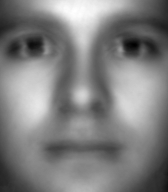

In [9]:
X̄ = vec(mean(X,dims=1))

X̄ = Int64.(round.(X̄))

imshow(X̄, (m₁, m₂))

### b) Calculer la matrice $Z$ centrée des visages de l'ensemble d'entraînement. Ensuite, afficher la différence entre le premier visage  et le visage moyen avec la fonction `imshow`.

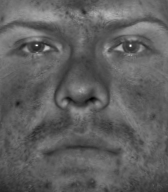

In [10]:
Z = X .- X̄'

imshow(Z[1,:], (m₁, m₂))

## 2.2 Décomposition en valeurs singulières de $Z$.

### a) Obtenez les matrices $U$ et $V$ ainsi que les valeurs singulières à l'aide de la fonction `svd` et/ou de la fonction `svdvals`.

In [11]:
F = svd(Z)
V = F.V
U = F.U
γ = F.S

784-element Array{Float64,1}:
 145366.58540410956
 116283.54578458458
  71856.10687572739
  45880.911321752625
  42723.53388098387
  37496.371108493004
  36425.79573529994
  33042.85561828739
  28329.06004097606
  27089.112211551314
  25048.302663733586
  24102.555521667688
  21723.66179180548
      ⋮
    275.65960719067385
    272.12860664253117
    268.93290273412475
    266.41655751730315
    263.6369368788763
    259.4706335402022
    255.26112389219455
    252.22280489890326
    250.364404830339
    243.74455054587835
    243.0588407759992
    236.01825066089208

### b) Affichez les premiers vecteurs singuliers de $V$ avec la fonction `imshow`. 

Ces composantes représentent les modes de plus grande variabilité. Dans la reconnaissance faciale, elles sont appelées les *eigenfaces*.

,,,,,,,

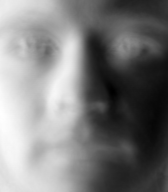
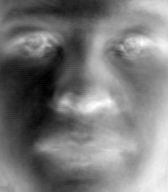
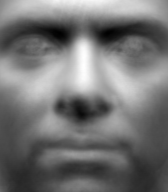
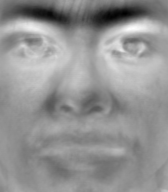
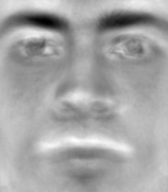
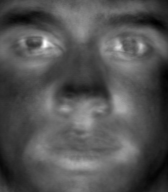
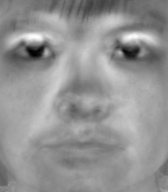
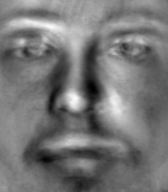

In [12]:
[imshow(V[:,i], (m₁, m₂)) for i=1:8]

## 2.3 Choix du nombre $k$ de vecteurs singuliers à utiliser

### a) Tracez un graphique permettant de voir le pourcentage de la variance totale retenue en fonction du nombre de vecteur singuliers.

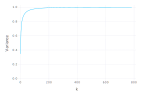

In [13]:
cumvar = cumsum(γ.^2)

ratio = cumvar / cumvar[end]

df = DataFrame(k = Int64[], Variance = Float64[])

for k in 1:length(ratio)
    push!(df, [k, ratio[k]])
end

plot(df, x=:k, y=:Variance, Geom.line)

### b) Calculez le pourcentage de la variance récupérée en utilisant 10, 50 et 70 composantes principales.

In [35]:
ratio[[10,50,70]]

3-element Array{Float64,1}:
 0.8053672725750084
 0.9457957538269388
 0.9627126959566592

# 3. Approximation d'une image à l'aide des vecteurs singuliers

Soit $k$ le nombre de vecteurs singuliers retenus. Nous allons approximer le visage $\mathbf{z}_i$ à l'aide des $k$ premières vecteurs singuliers. 

Dénotons par $V_k$ la matrice des $k$ premiers vecteurs singuliers de $V$. On cherche à trouver la combinaison linéaire des $k$ vecteurs qui approxime le visage $\mathbf{z}_i$ :

$$ \mathbf{Z}_i = V_k \mathbf{w} + \varepsilon ; $$

où $\mathbf{w}$ correspond au vecteur des poids de la combinaison linéaire et $\varepsilon$ correspond à l'erreur que l'on fait. L'erreur serait nulle si on utilisait tous les vecteurs singuliers.

On se retrouve donc dans un problème de régression où la variable d'intérêt est l'image du visage et où les variables explicatives sont les vecteur singuliers $V_k$. Pour trouver les coefficients de régression $\mathbf{w}$, il suffit de procéder comme au chapitre 2 :

$$ \mathbf{\hat{w}} = (V_k^\top V_k)^{-1} V_k^\top \mathbf{z}_i . $$

Or, puisque la matrice des vecteurs singuliers est orthonormales, la dernière équation se simplifie à l'expression suivante :

$$ \mathbf{\hat{w}} = V_k^\top \mathbf{z}_i . $$

Le visage $\mathbf{z}_i$ projeté dans les k premières composantes principales, dénoté par $\mathbf{\hat{z}}_i$,  est obtenue avec l'équation suivante :

$$ \mathbf{\hat{z}}_i = V_k \mathbf{\hat{w}}.$$



**Remarque :** On pourrait être de tenté de calculer la projection du visage en une seule étape, en remplaçant $\mathbf{w}$ par son expression :

$$ \mathbf{\hat{z}}_i = V_k \mathbf{\hat{w}} = V_k V_k^\top \mathbf{z}^\top_i.$$

La matrice $V_k V_k^\top$ correspond à une matrice de projection dans l'espace des $k$ premières composantes principales. Il faut cependant traiter le produit matricielle $V_k V_k^\top$ avec attention pour obtenir des résultats précis et rapides. Il est souvent plus judicieux de procéder en deux étapes :
1. Calculer les poids $\mathbf{\hat{w}}$.
2. Calculer la projection de l'image $\mathbf{\hat{z}}_i^\top = V_k \mathbf{\hat{w}}$.

## 3.1 Approximation du visage 1 avec les 10 premiers vecteurs singuliers

In [15]:
i = 1
k = 10

Vk = V[:,1:k]
zᵢ = Z[i,:]

32256-element Array{Float64,1}:
  18.0
  18.0
  17.0
  17.0
  18.0
  20.0
  17.0
  18.0
  21.0
  20.0
  17.0
  20.0
  21.0
   ⋮
 -15.0
 -12.0
 -14.0
 -14.0
  -4.0
 -15.0
 -20.0
 -22.0
 -26.0
 -25.0
 -26.0
 -30.0

### a) Calculez les coefficients ŵ

In [16]:
ŵ = Vk'*zᵢ

10-element Array{Float64,1}:
 -1241.5693738402383
 -2424.3998468678715
  -137.3353833701637
 -1040.5032513557062
  -248.90687131996626
   420.3773679050208
  -400.989977234314
   350.98431277806037
  -182.68783820369373
  1076.5064365789542

### b) Calculez l'approximation du visage 

In [17]:
ẑᵢ = Vk*ŵ

32256-element Array{Float64,1}:
 10.30944545338104
 10.221658874141962
 10.593204420377875
 11.14470807330032
 12.111674686898343
 12.504248366043575
 12.42626671476232
 12.409819492069616
 13.025229491032736
 12.611875261826057
 12.942745847748954
 13.312671856648295
 13.3144574018193
  ⋮
 -1.7409419611835268
 -2.478389300058964
 -3.144911695105478
 -3.519362144583035
 -4.193714405675414
 -4.967282346229284
 -4.71108381356424
 -4.289919014014536
 -4.557502026436567
 -5.955926115835943
 -8.455283730139517
 -9.714906066303154

### c) Affichez le visage original et son approximation

Vous pouvez ajouter le visage moyen pour une meilleure interprétation

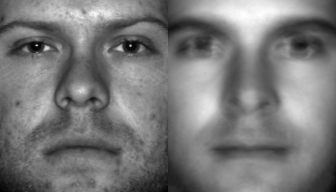

In [18]:
[imshow(X[i,:],(m₁, m₂)) imshow(ẑᵢ .+ X̄, (m₁, m₂))]

## 3.2 Approximation du visage 1 avec les 50 premières vecteurs singuliers

Reprenez les étapes précédentes mais cette fois en utilisant les 50 premiers vecteurs singuliers.

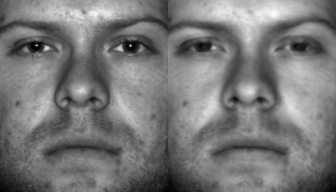

In [19]:
i = 1
k = 50

Vk = V[:,1:k]
zᵢ = Z[i,:]

ŵ = Vk'*zᵢ
ẑᵢ = Vk*ŵ

# Affichage de l'image originale et de l'approximation
[imshow(X[i,:],(m₁, m₂)) imshow(ẑᵢ .+ X̄, (m₁, m₂))]

## 3.3 Approximation du visage 1 avec les 70 premières vecteurs singuliers

Reprenez les étapes précédentes mais cette fois en utilisant les 70 premiers vecteurs singuliers.

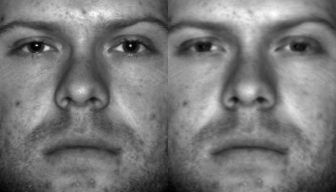

In [20]:
i = 1
k = 70

Vk = V[:,1:k]
zᵢ = Z[i,:]

ŵ = Vk'*zᵢ
ẑᵢ = Vk*ŵ

# Affichage de l'image originale et de l'approximation
[imshow(X[i,:],(m₁, m₂)) imshow(ẑᵢ .+ X̄, (m₁, m₂))]

## 3.3 Approximation du visage 29 avec les 50 premières vecteurs singuliers

Reprenez les étapes précédentes mais cette fois avec le visage 29.

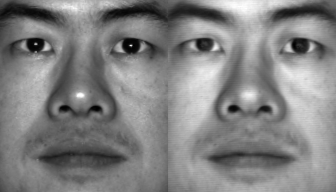

In [21]:
i = 29
k = 50

Vk = V[:,1:k]
zᵢ = Z[i,:]

ŵ = Vk'*zᵢ
ẑᵢ = Vk*ŵ

# Affichage de l'image originale et de l'approximation
[imshow(X[i,:],(m₁, m₂)) imshow(ẑᵢ .+ X̄, (m₁, m₂))]

# 4. Reconnaissance faciale


L'idée de la reconnaissance faciale consiste à comparer le vecteur des coefficient $\mathbf{\hat{w}}$ de l'image à reconnaître avec les vecteurs poids des images de l'ensemble d'entraînement. C'est une comparaison assez facile à faire car ce vecteur est de dimension raisonnable comparativement aux images originales. En effet, dans notre cas, si on prend 50 vecteurs singuliers, le vecteur des coefficient est un vecteur colonne de taille 50. On peut donc résumer toutes les images par leur vecteur des coefficients de taille 50. 

Pour savoir, si une nouvelle image représente une personne présente dans l'ensemble d'entraînement, on n'a qu'à comparer son vecteur des coefficients avec chacun des vecteurs des coefficients de l'ensemble d'entraînement. Cette comparaison est facile, rapide et efficace car les vecteurs sont de tailles raisonnables. Si la différence entre les vecteurs est très grande, cela suggère que la personne est inconnue de l'ensemble d'entraînement. Si la différence est petite avec un des vecteurs de coefficients, cela suggère qu'il s'agit de la même personne. Le seuil doit être ajusté avec de la validation croisée.

Dans cette section, vous déciderez si une nouvelle image de l'ensemble test représente un personne connue ou inconnue. Vous le ferez en complétant les étapes suivantes :

1. Calculez les poids de toutes les images de l'ensemble d'entraînement.
2. Calculez les poids de l'image de test.
3. Calculez la distance entre les vecteurs poids des images d'entraînement et celui de l'image de test.
4. Identifiez l'image de l'ensemble d'entraînement la plus proche de l'image de test.
5. Décidez si le visage se retrouve dans l'échantillon d'entraînement ou s'il est inconnu.

### 4.1 Calculez les poids de toutes les images de l'ensemble d'entraînement

Prenez pour l'instant $k = 50$ composantes.

In [22]:
k = 50

Vk = V[:,1:k]

W = Vk'*Z'

50×784 Array{Float64,2}:
 -1241.57    -1653.02    -1529.57     -287.801   …  -11833.8     -10835.6
 -2424.4     -3249.17    -2003.23     -589.972        4271.66      5716.2
  -137.335    2845.4      6374.51    -2545.18         3903.22     -4512.72
 -1040.5      -784.661    -256.657   -1119.35          902.167      794.443
  -248.907    -328.106    -599.941    -252.628        3181.88      2324.45
   420.377     100.073    -929.415     514.241   …   -2487.38     -1675.27
  -400.99      -65.1004     55.8987   -365.714         -10.083      404.175
   350.984     391.872     580.52      659.419         511.712    -1514.95
  -182.688    -947.937   -1422.22     -185.939          45.6406    -808.092
  1076.51     1001.23      232.528    1063.37         1863.33      -605.055
  -132.971     -54.2153     29.6504   -470.463   …     943.191     1574.16
  1000.39      950.909     779.646    1061.6           512.839      579.797
  -812.87     -694.712    -211.432   -1154.02         -815.558    -1198.

### 4.2 Calculez les poids de l'image de test

Prenons d'abord la première image de l'échantillon de test. Il faut charger l'image, retirer le visage moyen et calculer les poids.


In [23]:
# Récupération de tous les noms de fichiers de l'échantillon d'entraînement
file = readdir("Test")
testFileName = ["Test/"*file[i] for i=1:length(file)];

In [24]:
# conversion de l'image de test en intensités de gris et retrait du visage moyen

j = 1  # j^e image de l'échantillon de test

y = imgrayconvert(testFileName[j]) - X̄

32256-element Array{Int64,1}:
  32
  29
  27
  29
  33
  32
  36
  36
  32
  31
  30
  32
  34
   ⋮
 -13
 -19
 -21
 -21
 -20
 -21
 -21
 -26
 -28
 -24
 -26
 -27

In [30]:
# Calcul des poids de l'image de l'échantillon de test
ŵ = Vk'*y

50-element Array{Float64,1}:
   352.7437297666436
 -2881.814317555777
 -1477.9970244534352
 -1078.8372867130724
  -334.89528362410783
   558.6922704438296
  -389.9359206149321
   770.3403839238624
  -476.26865647529553
  1127.277865610702
  -506.36547342731353
   944.6672296276703
 -1145.399209366282
     ⋮
  -692.5288006002643
  -194.9514238167257
   191.28422337006452
     0.6204383632065782
    49.5848962175698
  -177.66961472220953
   190.50354990262224
  -208.75542666651992
   129.94513027397946
  -166.55810805954374
   194.97228514770683
  -388.5866372047757

### 4.3 Calculez la distance euclidienne entre les vecteurs poids des images d'entraînement et celui de l'image de test.

In [31]:
d = sum( (W .- ŵ).^2, dims=1 )

1×784 Array{Float64,2}:
 6.04352e6  2.84337e7  8.446e7  7.60379e6  …  3.07669e8  2.90303e8  2.66239e8

### 4.4 Identifiez l'image de l'ensemble d'entraînement la plus proche de l'image de test.

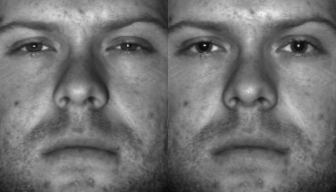

In [33]:
minval, ind = findmin(d)
ind = ind[1]

[load(testFileName[j]) load(trainFileName[ind])]

### 4.5 Décidez si le visage se retrouve dans l'échantillon d'entraînement ou s'il est inconnu.

Si la distance minimale entre les poids des images d'entraînement et des poids de l'image de test, alors on statuera que le visage est inconnu. Il faut définir cependant définir ce seuil à l'aide de la validation croisée. Tentez d'utiliser le seuil de (3500)^2 et refaites les étapes du numéro 4 avec les autres images de l'ensemble de test.  

In [34]:
if minval > 3500^2
    println("Le visage est inconnu.")
else
    println("Le visage est connu.")
end

Le visage est connu.


In [29]:
# # Récupération des noms des personnes sur les images de l'ensemble d'entraînement
# ind1 = findfirst(isequal('/'),trainFileName[1])
# ind2 = findfirst(isequal('_'),trainFileName[1])
# trainPerson = [trainFileName[i][ind1+1:ind2-1] for i=1:length(trainFileName)];
